In [417]:
import pandas as pd
import numpy as np

In [418]:
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DACON/DAEGU_CAR_ACCIDENT/data_org/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DACON/DAEGU_CAR_ACCIDENT/data_org/test.csv")

### ECLO에 맞춰 데이터를 증강 -> 실패(이유) -> smote는 기본적으로 classification이기 때문에 증강하고자하는 class의 개수(비율)가 중요-> 그렇다면 ECLO의 클래스를 줄여줌 0 ~ 5 -> 0으로 6 ~ 10 -> 1로, 11 ~ 15 -> 2로, 15 ~ -> 3으로


사망자수, 중상자수, 경상자수, 부상자수에 EDA

## 사망자수

#### 사망자수는 0,1,2, 그중 0이 압도적으로 많아 데이터 증강 가능 -> 데이터의 개수가 엄청늘어남(하지만 표본이 적어 증강한 데이터가 대표성을 띄는 지 여부 판단 불가능)

<Axes: >

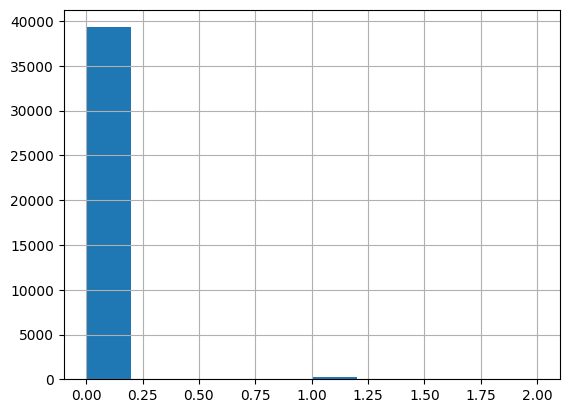

In [419]:
train_df['사망자수'].hist()

## 중상자수

#### 중상자수 역시 class가 7개로 가능 사망자수와 비슷한 상황

<Axes: >

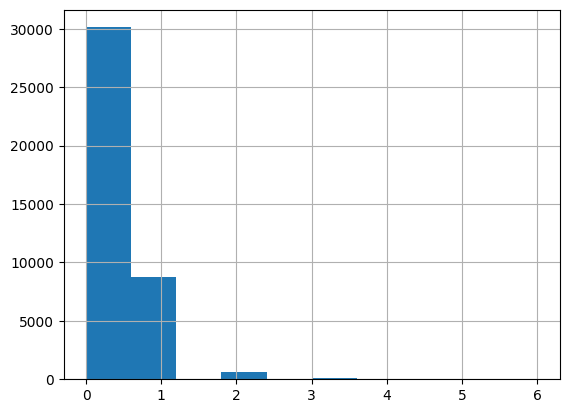

In [420]:
train_df['중상자수'].hist()

In [421]:
train_df['중상자수'].value_counts()

0    30136
1     8724
2      618
3       98
4       28
5        4
6        1
Name: 중상자수, dtype: int64

## 경상자수

### 총 class가 23개로 불가능 -> 범위를 만들어 줘야 데이터 증강 가능

<Axes: >

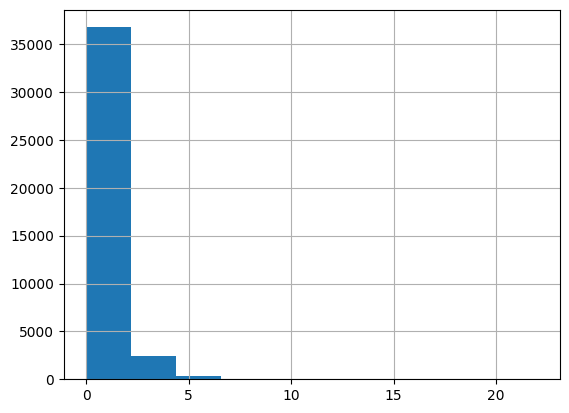

In [422]:
train_df['경상자수'].hist()

In [423]:
train_df['경상자수'].value_counts()[:5]

1    20913
0    10284
2     5560
3     1728
4      732
Name: 경상자수, dtype: int64

## 부상자수 # 경상자수와 마찬가지

<Axes: >

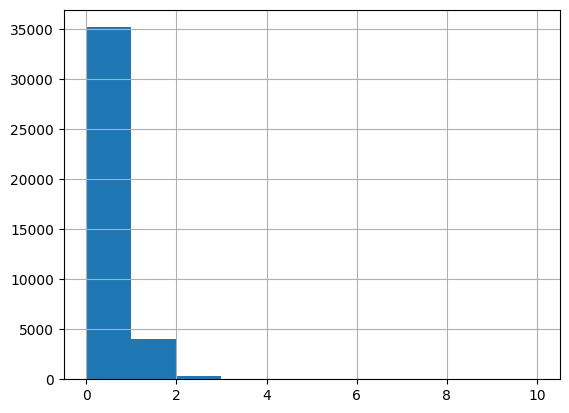

In [424]:
train_df['부상자수'].hist()

In [425]:
train_df['부상자수'].value_counts()

0     35168
1      4046
2       279
3        67
4        35
5         9
6         3
7         1
10        1
Name: 부상자수, dtype: int64

## ECLO

<Axes: >

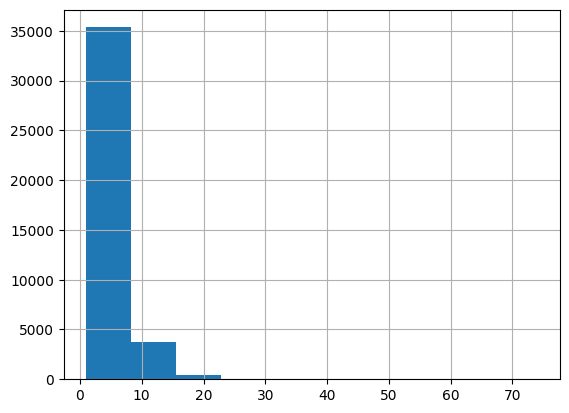

In [426]:
train_df['ECLO'].hist()

In [427]:
train_df['ECLO'].value_counts()[:5]

3    18675
5     6743
6     4967
1     2578
9     1528
Name: ECLO, dtype: int64

## 사망자수, 중상자수, 경상자수, 부상자수, ECLO 평균

In [428]:
print("사망자수 평균:{0}, 중상자수 평군:{1}, 경상자수 평균:{2}, 부상자수 평균:{3}, ECLO 평균:{4}".format(train_df['사망자수'].mean(),train_df['중상자수'].mean(),train_df['경상자수'].mean(),train_df['부상자수'].mean(),train_df['ECLO'].mean()))

사망자수 평균:0.007776010502663536, 중상자수 평군:0.2623646141028554, 경상자수 평균:1.0700850816733571, 부상자수 평균:0.12686510641520868, ECLO 평균:4.726703526976192


## ECLO에 맞춰 데이터를 증강 -> 실패(이유) -> smote는 기본적으로 classification이기 때문에 ->
##그렇다면 ECLO의 클래스를 줄여줌 0 ~ 5 -> 0, 6 ~ 10 -> 1, 11 ~ 15 -> 2, 15 ~ -> 3


In [429]:
train_ECLO=train_df['ECLO'] # 실패 -> class의 개수가 너무 많다

In [430]:
train_df['ECLO_range'] = train_df[['ECLO']].applymap(lambda x: 0 if x <= 5 else (1 if x <= 10 else (2 if x <= 15 else 3))) # ECLO의 범위를 만들어 줄여줌
train_y=train_df['ECLO_range']

In [431]:
train_df.drop(['ID','사고일시','시군구'], axis=1 ,inplace = True)
test_df.drop(['ID','사고일시','시군구'], axis=1 ,inplace = True)

In [432]:
train_df=train_df[test_df.columns]
train_df['ECLO'] = train_ECLO

<ipython-input-432-afb0adca356a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['ECLO'] = train_ECLO


In [433]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요일      39609 non-null  object
 1   기상상태    39609 non-null  object
 2   도로형태    39609 non-null  object
 3   노면상태    39609 non-null  object
 4   사고유형    39609 non-null  object
 5   ECLO    39609 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.8+ MB


## smote를 위한 간단한 라벨링 이후 디코딩가능

In [434]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder를 객체로 생성합니다.
le_dayofweek = LabelEncoder() # 일일이 객체를 지정해줘야 이후 디코딩 가능
le_weather = LabelEncoder()
le_road_state = LabelEncoder()
le_road_type = LabelEncoder()
le_acc_type = LabelEncoder()


cat_list = ['요일','기상상태','노면상태','도로형태','사고유형']


train_df['요일'] = le_dayofweek.fit_transform(train_df['요일'])
train_df['기상상태'] = le_weather.fit_transform(train_df['기상상태'])
train_df['노면상태'] = le_road_state.fit_transform(train_df['노면상태'])
train_df['도로형태'] = le_road_type.fit_transform(train_df['도로형태'])
train_df['사고유형'] = le_acc_type.fit_transform(train_df['사고유형'])

In [435]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df, train_y, test_size=0.2, random_state = 42)

## smote

In [436]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_churn_sm, Y_churn_sm = smote.fit_resample(X_train, y_train)

In [437]:
display(X_churn_sm), display(Y_churn_sm)

,요일,기상상태,도로형태,노면상태,사고유형,ECLO
0,0,2,1,0,1,3
1,4,2,1,0,1,3
2,0,2,6,0,1,3
3,1,2,6,0,1,3
4,5,2,1,0,1,9
...,...,...,...,...,...,...
92711,1,2,0,0,1,18
92712,0,2,6,0,1,18
92713,4,2,6,0,1,17
92714,2,2,6,0,1,16


0        0
1        0
2        0
3        0
4        1
        ..
92711    3
92712    3
92713    3
92714    3
92715    3
Name: ECLO_range, Length: 92716, dtype: int64

(None, None)

In [438]:
Y_churn_sm.value_counts()

0    23179
1    23179
2    23179
3    23179
Name: ECLO_range, dtype: int64

#디코딩

In [439]:
X_churn_sm['요일'] = le_dayofweek.inverse_transform(X_churn_sm['요일'])
X_churn_sm['기상상태'] = le_weather.inverse_transform(X_churn_sm['기상상태'])
X_churn_sm['노면상태'] = le_road_state.inverse_transform(X_churn_sm['노면상태'])
X_churn_sm['도로형태'] = le_road_type.inverse_transform(X_churn_sm['도로형태'])
X_churn_sm['사고유형'] = le_acc_type.inverse_transform(X_churn_sm['사고유형'])
X_churn_sm.head(3)

,요일,기상상태,도로형태,노면상태,사고유형,ECLO
0,금요일,맑음,교차로 - 교차로안,건조,차대차,3
1,일요일,맑음,교차로 - 교차로안,건조,차대차,3
2,금요일,맑음,단일로 - 기타,건조,차대차,3


## ADASYN

In [440]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=22)
X_train_ad, Y_train_ad = adasyn.fit_resample(X_train, y_train)

In [441]:
display(X_train_ad), display(Y_train_ad)

,요일,기상상태,도로형태,노면상태,사고유형,ECLO
0,0,2,1,0,1,3
1,4,2,1,0,1,3
2,0,2,6,0,1,3
3,1,2,6,0,1,3
4,5,2,1,0,1,9
...,...,...,...,...,...,...
92668,1,2,6,0,1,16
92669,1,3,6,0,1,16
92670,1,4,6,0,1,16
92671,1,2,6,0,1,16


0        0
1        0
2        0
3        0
4        1
        ..
92668    3
92669    3
92670    3
92671    3
92672    3
Name: ECLO_range, Length: 92673, dtype: int64

(None, None)

In [442]:
Y_train_ad.value_counts()

2    23188
0    23179
3    23174
1    23132
Name: ECLO_range, dtype: int64

#디코딩

In [443]:
X_train_ad['요일'] = le_dayofweek.inverse_transform(X_train_ad['요일'])
X_train_ad['기상상태'] = le_weather.inverse_transform(X_train_ad['기상상태'])
X_train_ad['노면상태'] = le_road_state.inverse_transform(X_train_ad['노면상태'])
X_train_ad['도로형태'] = le_road_type.inverse_transform(X_train_ad['도로형태'])
X_train_ad['사고유형'] = le_acc_type.inverse_transform(X_train_ad['사고유형'])
X_train_ad.head(3)


,요일,기상상태,도로형태,노면상태,사고유형,ECLO
0,금요일,맑음,교차로 - 교차로안,건조,차대차,3
1,일요일,맑음,교차로 - 교차로안,건조,차대차,3
2,금요일,맑음,단일로 - 기타,건조,차대차,3


SMOTE를 한다면 경상자수, 부상자수, ECLO의 경우 range로 잡아 범위를 줘야할듯 그리고 다시 원래 ECLO를 잡으려면 range로 잡은 범위만큼의 퍼센트로
EX) ECLO가 0으로 증강된 데이터가 있다면 이 데이터중 (ECLO가 1인 데이터의 개수/ECLO 1 ~ 5 전체) ECLO를 1로

### 설명이 어려워서 코드로 구현 위의 smote 데이터 사용


In [444]:
X_churn_sm['ECLO_range'] =  Y_churn_sm

ECLO가 3인 데이터 개수: 18675</br>
ECLO가 5인 데이터 개수: 6743</br>
ECLO가 1인 데이터 개수: 2578</br>
ECLO가 4인 데이터 개수: 818

ECLO_range가 0인 데이터 중 ECLO가 1인 비율 = 2578/28,814 = 약 0.09

In [445]:
X_churn_sm.head()

,요일,기상상태,도로형태,노면상태,사고유형,ECLO,ECLO_range
0,금요일,맑음,교차로 - 교차로안,건조,차대차,3,0
1,일요일,맑음,교차로 - 교차로안,건조,차대차,3,0
2,금요일,맑음,단일로 - 기타,건조,차대차,3,0
3,목요일,맑음,단일로 - 기타,건조,차대차,3,0
4,토요일,맑음,교차로 - 교차로안,건조,차대차,9,1


In [446]:
X_churn_sm.loc[X_churn_sm['ECLO_range']==0][:5]

,요일,기상상태,도로형태,노면상태,사고유형,ECLO,ECLO_range
0,금요일,맑음,교차로 - 교차로안,건조,차대차,3,0
1,일요일,맑음,교차로 - 교차로안,건조,차대차,3,0
2,금요일,맑음,단일로 - 기타,건조,차대차,3,0
3,목요일,맑음,단일로 - 기타,건조,차대차,3,0
5,일요일,맑음,단일로 - 기타,건조,차대차,3,0


In [447]:
# 조건을 만족하는 행 선택
selected_rows = X_churn_sm.loc[X_churn_sm['ECLO_range'] == 0]

# 선택된 행 중 0.09의 비율로 랜덤하게 샘플링
fraction_to_change = 0.09
rows_to_change = selected_rows.sample(frac=fraction_to_change, random_state=42)

# 선택된 행의 'ECLO' 열 값을 1로 설정
X_churn_sm.loc[rows_to_change.index, 'ECLO_sm'] = 1

# 변경된 데이터 확인
print(X_churn_sm.head(10))

    요일 기상상태            도로형태   노면상태  사고유형  ECLO  ECLO_range  ECLO_sm
0  금요일   맑음      교차로 - 교차로안     건조   차대차     3           0      NaN
1  일요일   맑음      교차로 - 교차로안     건조   차대차     3           0      NaN
2  금요일   맑음        단일로 - 기타     건조   차대차     3           0      NaN
3  목요일   맑음        단일로 - 기타     건조   차대차     3           0      NaN
4  토요일   맑음      교차로 - 교차로안     건조   차대차     9           1      NaN
5  일요일   맑음        단일로 - 기타     건조   차대차     3           0      NaN
6  토요일   맑음        단일로 - 기타     건조   차대차    10           1      NaN
7  금요일   맑음  교차로 - 교차로횡단보도내     건조   차대차    12           2      NaN
8  일요일   맑음      교차로 - 교차로안     건조   차대차     3           0      NaN
9  목요일   흐림     단일로 - 고가도로위  젖음/습기  차량단독     1           0      NaN


In [448]:
X_churn_sm.loc[X_churn_sm['ECLO_sm']==1][:5]

,요일,기상상태,도로형태,노면상태,사고유형,ECLO,ECLO_range,ECLO_sm
51,월요일,맑음,교차로 - 교차로부근,건조,차대차,5,0,1.0
52,화요일,맑음,단일로 - 기타,건조,차대차,5,0,1.0
63,월요일,맑음,단일로 - 기타,건조,차대사람,3,0,1.0
65,화요일,맑음,교차로 - 교차로부근,건조,차대차,3,0,1.0
75,토요일,맑음,단일로 - 기타,건조,차대차,3,0,1.0


### 증강된 데이터의 비율은 거의 비슷함 -> 하지만 원래 존재하지 않는 데이터 2가 생김 -> 1로 변경

In [453]:
X_churn_sm.loc[X_churn_sm['ECLO'] == 2, "ECLO"] = 1

In [454]:
X_churn_sm.loc[X_churn_sm['ECLO'] == 2]

,요일,기상상태,도로형태,노면상태,사고유형,ECLO,ECLO_range,ECLO_sm
